# Tips dataset analysis

Description: Fundamentals of Data Analysis - assignment project, GMIT 2019. See README.md for more background info.

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Date of creation: 23-09-2019

This Notebook should be read in conjunction with the corresponding README.md file at the assignment repository at GitHub: <https://github.com/andkoc001/Tips_dataset_analysis/>.

___

## Setting up the environment

### Importing additional packages  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

For a better readability, let's change the Seaborn plots style to _darkgrid_.

In [3]:
sns.set(style="darkgrid")

### Tips dataset

Datasets are typically given in a form of an array, where the dataset attributes (aka features) are organised in columns, and the observations (aka instances) - in rows.

The _tips dataset_ is a representation of tips given in a restaurant. The data points were allegedly collected by a waiter working in the restaurant for a number of months. The dataset consists of several data categories describing tips received in connection to circumstances, such as day of the week, total bill, etc. The data set includes 244 data observations.

### Loading the data set

The _tips dataset_, as a .csv file, can be obtained from (for example) [here](http://vincentarelbundock.github.io/Rdatasets/datasets.html).  

However the _tips dataset_ is also integrated with the [Seaborn](https://seaborn.pydata.org/) package, an external Python package for data visualisation, used also in this analysis. This dataset will be used in the subsequent analysis. 

Assigning the dataset to variable `tips`.

In [10]:
# Loading the data set
tips = sns.load_dataset("tips")

### The dataset integrity check and insight into the database 

Let's first see what is the shape of the data set, that is how many raws and how many columns are there.

In [6]:
tips.shape # number of rows and columns respectively

(244, 7)

As it is a good practice to check the data inetegrity, let's see if there are any empty cells or currupted data. We will use for this purpose the `df.isnull().any()` funtion, which checks if there is any `null` value in _any_ column. If the output is _False_, that means the column does not contain any `null` value.

In [7]:
tips.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In similar way, let's check datatype for each column, using `data.dtypes` method.

In [18]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Below are listed several first raws of data displayed.

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The last several rows of the dataset (in case it got currupted):

In [7]:
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


___

## Data analysis

### Descriptive statistical analysus

Basic statistical description of the numerical categories of the data set.

In [9]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Generating scatter plots  
This section is based on official Seaborn [tutorial](https://seaborn.pydata.org/tutorial/relational.html).

The default kind of the plot (scatter) is used.  
The values on x-axis are describe the total bill; y-axis - amount of tip received.

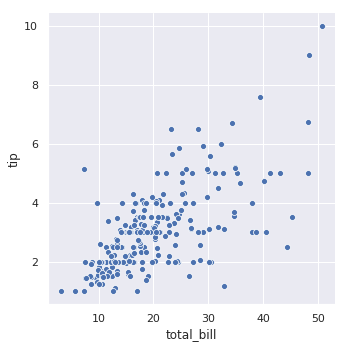

In [8]:
sns.relplot(x="total_bill", y="tip", data=tips);

Although the plot is 2D, a third variable (3rd dimension).
It can be represented by colour (as shown below) or by shape of the marker. 

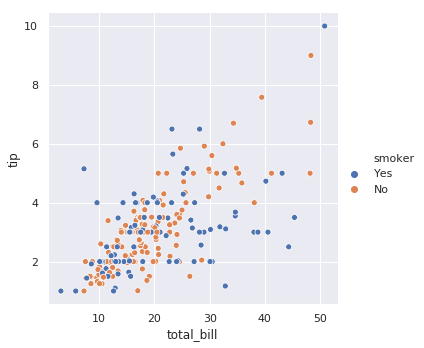

In [9]:
# Adding 3rd dimension, represented by colours.
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

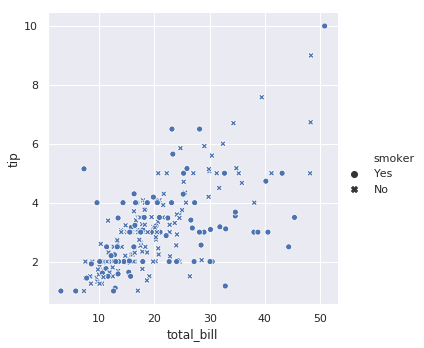

In [10]:
# 3-dimensional plot, where the 3rd axis is represented by shape of marker
sns.relplot(x="total_bill", y="tip", style="smoker", data=tips);

It is also possible to show 4 different set of variables (4 dimensions), by differenting the data points by colour and the shape of the markers at the same time.

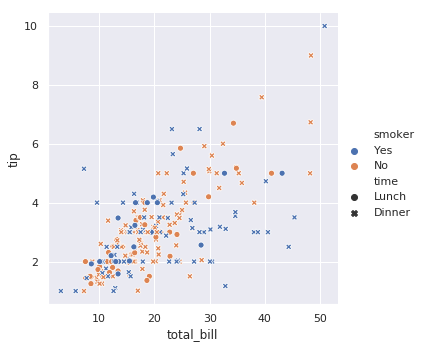

In [11]:
# 4-dimensional plot
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

For numeric variables, a squential palette (shades of the same colour) apply. The default colour palette can be modified, as below.

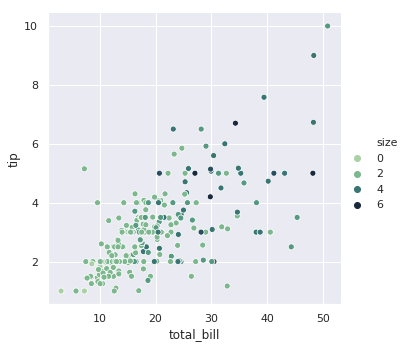

In [12]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

Yet another way of adding extra dimension is by the means of size of the marker, as below.

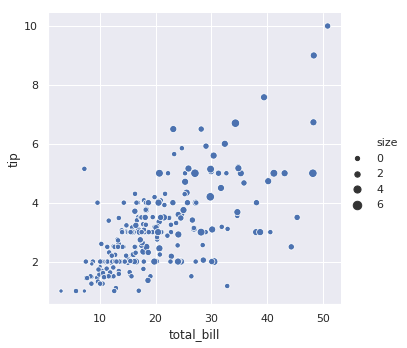

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

The default marker sizes can be altered (as well as combined with previously discussed means of representing variables).

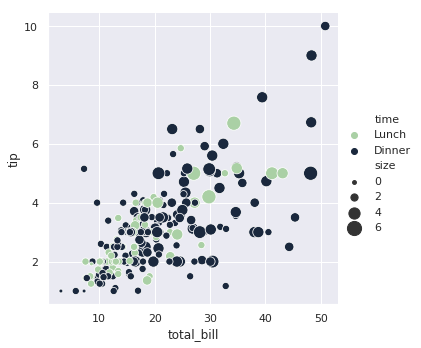

In [14]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), hue="time", palette="ch:r=-.5,l=.75", data=tips);

## k-nearest neighbors algorithm
Based on the Programming for Data Analysis, GMIT, lecture videos and [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/raw/master/pandas-with-iris.ipynb).  
Other references:  
[Machine Learning Basics with the K-Nearest Neighbors Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)  
[K-Nearest Neighbors Algorithm Using Python](https://www.edureka.co/blog/k-nearest-neighbors-algorithm/)

### Importing SciKit Learn Library

In [1]:
import sklearn.neighbors as nei
import sklearn.model_selection as mod

In [9]:
tips.head(2) # shape reminder: (244, 7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


#### A glimpse into plot.  
The below plot - relationship between tip size, total bill and the sex - is deemed the most suitable for the algorithm application. The other variables produce more fuzzy plots (a lot of overlapping data points).

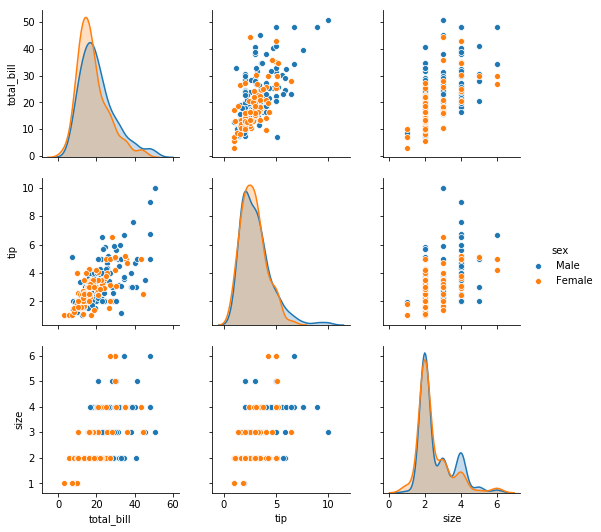

In [17]:
sns.pairplot(tips, hue="sex") 

#### Inputs and Outputs

In [18]:
inputs = tips[['total_bill', 'tip']]
outputs = tips['sex']

#### Classifier

In [20]:
knn = nei.KNeighborsClassifier(n_neighbors=5) # will consider 5 nearest neighbours

#### Fit function

In [21]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Evaluate

In [25]:
(knn.predict(inputs) == outputs).sum() # Returns number of correctly recognised samples; total number of samples is 244

178

#### Training and testing data sub-sets
Splitting the dataset randomly into:  
1) training (75% of entire dataset size, i.e. 183), and  
2) testing (25%, i.e. 61)

In [40]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.25)

In [41]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
# knn.predict(inputs_test) == outputs_test

In [46]:
answer = (knn.predict(inputs_test) == outputs_test).sum()
answer

37

#### Accuracy

Ratio of correctly recognised to actual number

In [50]:
(answer/61) * 100

60.65573770491803